In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from collections import Counter
from string import punctuation

from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
#nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import skimage

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [5]:
from keras.preprocessing.image import (load_img
                                       , array_to_img
                                       , img_to_array
                                       , ImageDataGenerator)
import keras

Using TensorFlow backend.


In [6]:
file = open('photo.json', 'r')

In [7]:
stop = 200000
all_data = []

for i, line in enumerate(file):
    if i%200000 == 0:
        print(i)
    if i == stop:
        break
    
    data = json.loads(line)
    
    photo_id = data['photo_id']
    business_id = data['business_id']
    caption = data['caption']
    label = data['label']
    
    all_data.append([photo_id
                     , business_id
                     , caption
                     , label])
    
df = pd.DataFrame(all_data, columns = ['photo_id'
                                       , 'business_id'
                                       , 'caption'
                                       , 'label'])

file.close()

0


In [8]:
df.head()

,photo_id,business_id,caption,label
0,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,,inside
1,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,,inside
2,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,,food
3,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,,inside
4,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,,inside


In [9]:
df.label.value_counts()

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64

In [10]:
df['photo_path'] = '/home/david/Downloads/photos/'+ df.photo_id + '.jpg'

In [11]:
df.head(1)

,photo_id,business_id,caption,label,photo_path
0,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,,inside,/home/david/Downloads/photos/MllA1nNpcp1kDteVg...


In [12]:
classes_ctn = pd.DataFrame(df.label.value_counts())
classes_ctn

,label
food,114874
inside,52448
drink,18121
outside,11534
menu,3023


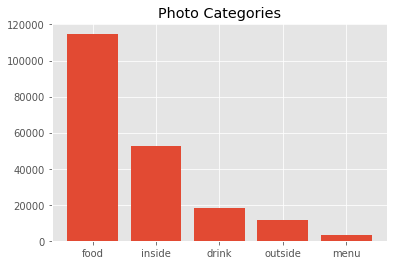

In [208]:
plt.bar(classes_ctn.index, classes_ctn.label)
plt.title('Photo Categories')
plt.savefig('photo_cat_ctn.png');

In [270]:
df_short_balanced = df.groupby('label').apply(lambda x: x.sample(n=3023)).reset_index(drop=True)

In [271]:
df_short_balanced.label.value_counts()

food       3023
menu       3023
outside    3023
inside     3023
drink      3023
Name: label, dtype: int64

In [16]:
df_short_balanced.shape

(15000, 5)

In [17]:
img = cv2.imread('/home/david/Downloads/photos/'+ df.photo_id.iloc[0] + '.jpg'
                 , 0) #1 is color, 0, is grayscale, -1 is alpha channel


In [18]:
print(img)

[[  0  43   8 ...  11  32   0]
 [ 34 150 158 ... 142 115  19]
 [  8 176 200 ... 171 172  29]
 ...
 [ 11  15  15 ...  18  17   4]
 [ 17  17  22 ...  10  13   4]
 [  3   9  14 ...   4  10   2]]


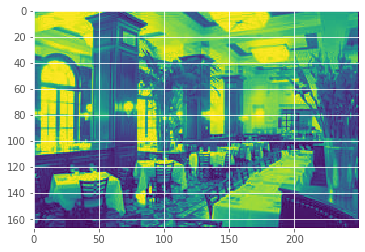

In [19]:
plt.imshow(img);

Reference: https://github.com/netik1020/Concise-iPython-Notebooks-for-Deep-learning/blob/master/Image_Classifier/skin_cancer_classification_1.ipynb

In [20]:
df_short_balanced.head(1)

,photo_id,business_id,caption,label,photo_path
0,WTPA6Qk7r5_M42oYQsvNwA,urSuLlkYXXI5uwtKIxl9ew,Drip Coffee with Cream & Sugar,drink,/home/david/Downloads/photos/WTPA6Qk7r5_M42oYQ...


In [21]:
img1 = load_img(df_short_balanced.photo_path.iloc[0]
              , grayscale=True
              , target_size=(150,150))

img2 = load_img(df_short_balanced.photo_path.iloc[1]
              , grayscale=True
              , target_size=(150,150))

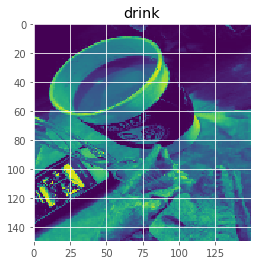

In [22]:
plt.imshow(img1)
plt.title(df_short_balanced.label.iloc[0]);

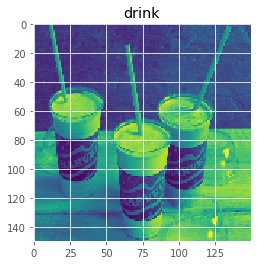

In [23]:
plt.imshow(img2)
plt.title(df_short_balanced.label.iloc[1]);

In [252]:
X = [load_img(df_short_balanced.photo_path.iloc[x]
                      , grayscale=True
                      , target_size=(128,128)) for x in range(len(df_short_balanced))]

In [253]:
len(X)

15000

In [254]:
test_img = img_to_array(X[0]).flatten()

In [255]:
type(test_img)

numpy.ndarray

In [256]:
photo_arr = []
for i in range(len(df_short_balanced)):
    photo_arr.append(img_to_array(X[i]).flatten())

In [257]:
len(photo_arr)

15000

In [258]:
len(photo_arr[0])

16384

In [214]:
pca = PCA(n_components=1000)

In [215]:
photo_pca = pca.fit(photo_arr)

In [216]:
photo_red = photo_arr @ photo_pca.components_[0:5].T

In [217]:
photo_pca.components_[0:1000].T[4]

array([ 1.89695374e-02, -2.46000914e-02, -1.14095567e-02,  1.50078918e-02,
        3.60517444e-03,  2.29203210e-02, -1.15247502e-02, -2.43999116e-02,
       -1.59536232e-02, -8.16793986e-03, -1.78822987e-02, -1.96742152e-03,
        1.33694589e-02,  1.95726459e-02,  1.21522245e-02,  2.47446268e-02,
        4.08213099e-03,  2.13616753e-02,  1.37590500e-02,  1.75208863e-02,
       -7.59202057e-03,  1.68122757e-02, -2.20804906e-02, -8.01629516e-04,
        6.43962834e-03,  3.16752078e-03,  1.01158034e-02, -2.36808989e-02,
        2.51844156e-02,  4.44653147e-04, -2.98493458e-05,  1.56307665e-02,
       -2.82581554e-03, -3.86926849e-02, -1.02333578e-02, -4.08446594e-03,
       -1.87057284e-03,  1.37427093e-02, -1.97747732e-02, -1.59109521e-02,
        1.60330110e-03,  1.69209205e-03, -1.55390109e-02,  7.20082291e-03,
        1.92204480e-02,  5.87343607e-03, -5.12127019e-03, -3.49140566e-02,
        1.11525098e-02,  7.14854740e-03,  3.52828719e-02, -4.60828628e-03,
        3.43731002e-03,  

In [218]:
photo_red[4]

array([4815.90922973, 2028.3815324 , -791.87945974, -413.71858956,
        291.73575794])

In [219]:
photo_arr[0][:5]

array([0., 0., 0., 0., 0.], dtype=float32)

In [220]:
len(photo_red[0])

5

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(photo_arr
                                                   , df_short_balanced.label
                                                   , stratify=df_short_balanced.label
                                                   , random_state=42)

# SVM Classifier

In [141]:
from sklearn import svm
model = svm.SVC(kernel='linear'
               , probability=True)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [142]:
y_pred = model.predict(X_test)


In [143]:
y_pred

array(['outside', 'outside', 'outside', ..., 'outside', 'outside',
       'outside'], dtype=object)

In [144]:
y_pred[0]

'outside'

In [145]:
y_test_val = y_test.values
y_test_val

array(['drink', 'menu', 'outside', ..., 'inside', 'inside', 'menu'],
      dtype=object)

In [146]:
y_test_val[0]

'drink'

In [147]:
print(len(y_pred))
print(len(y_test))

3750
3750


In [148]:
test = [y_pred[x]==y_test_val[x] for x in range(len(y_pred))]

In [149]:
t = 0
for x in test:
    if x==True:
        t+=1
t        

750

In [150]:
t/len(y_pred)

0.2

# Stochastic GD Model

In [260]:
sgd_clf = SGDClassifier(random_state=42
                        , max_iter=1000
                        , tol=1e-3)


In [261]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [262]:
y_pred = sgd_clf.predict(X_test)

In [263]:
y_pred

array(['drink', 'outside', 'drink', ..., 'inside', 'drink', 'food'],
      dtype='<U7')

In [264]:
y_pred[0]

'drink'

In [265]:
y_test_val = y_test.values
y_test_val

array(['drink', 'menu', 'outside', ..., 'inside', 'inside', 'menu'],
      dtype=object)

In [266]:
print(len(y_pred))
print(len(y_test))

3750
3750


In [267]:
test = [y_pred[x]==y_test_val[x] for x in range(len(y_pred))]

In [268]:
t = 0
for x in test:
    if x==True:
        t+=1
t   

1156

In [269]:
t/len(y_pred)

0.3082666666666667

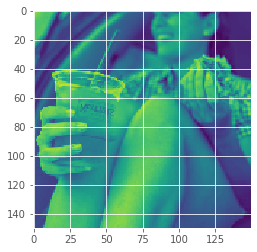

In [36]:
plt.imshow(X[0]);

In [37]:
X_hog = [hog(X[_]
            , pixels_per_cell=(12, 12)
            , cells_per_block=(2,2)
            , orientations=8
            , visualise=True
            , block_norm='L2-Hys')[1] for _ in range(len(df_short_balanced))

SyntaxError: unexpected EOF while parsing (<ipython-input-37-b54b014b766c>, line 6)

In [42]:
img1_hog = hog(X[0]
            , pixels_per_cell=(12, 12)
            , cells_per_block=(2,2)
            , orientations=8
            , visualise=True
            , block_norm='L2-Hys')[0]

In [44]:
img1_hog

array([0.17775909, 0.21004976, 0.05921235, ..., 0.22804418, 0.34504051,
       0.16003278])

In [56]:
km = ImageDataGenerator(rescale=5/255)

data = km.flow_from_dataframe(df_short_balanced
                                   , x_col='photo_path'
                                   , y_col='label'
                                   , target_size=(100,100)
                                   , batch_size=10
                                   , class_mode='categorical'
                                   )

Found 15000 validated image filenames belonging to 5 classes.


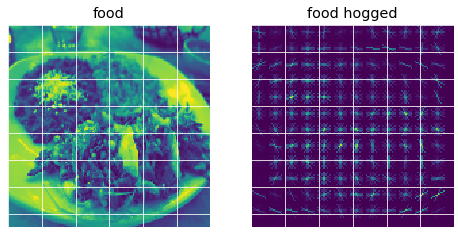

In [86]:

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]
 
ax[0].imshow(X[123])
ax[0].set_title(y[123])
ax[1].imshow(img_test_hog)
ax[1].set_title(y[123] + ' hogged')
plt.show()

In [100]:
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(pixels_per_cell=(8, 8)
                        , cells_per_block=(2,2)
                        , orientations=9
                        , block_norm='L2-Hys'
                        )

scalify = StandardScaler()
one_hot = OneHotEncoder()